In [1]:
import rasterio
import numpy as np

# Open the first TIF file using rasterio
with rasterio.open('VIIRS2022.tif') as src1:
    # Read the image data as a numpy array and get the metadata
    img1 = src1.read(1)
    meta1 = src1.profile

# Open the second TIF file using rasterio
with rasterio.open('VIIRS2013.tif') as src2:
    # Read the image data as a numpy array and get the metadata
    img2 = src2.read(1)
    meta2 = src2.profile

# Calculate the weighted distance between the two images
w1 = 0.5 # You can adjust the weight values as per your preference
w2 = 0.5
wd = np.sqrt(w1 * np.power(img1.astype(np.float32) - img2.astype(np.float32), 2) +
             w2 * np.power(np.abs(img1.astype(np.float32) - img2.astype(np.float32)), 1.5))

# Write the weighted distance image to a new TIF file using the metadata of the first image
with rasterio.open('C.tif', 'w', **meta1) as dst:
    dst.write(wd.astype(meta1['dtype']), 1)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the TIF image using the imread function from matplotlib.image
img = mpimg.imread('C.tif')

# Display the image using the imshow function from matplotlib.pyplot
plt.imshow(img)

# Show the plot
plt.show()


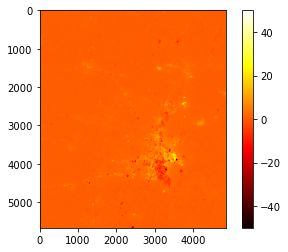

In [4]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the DNB images
with rasterio.open('VIIRS2022.tif') as src1:
    dnb1 = src1.read(1)
with rasterio.open('VIIRS2013.tif') as src2:
    dnb2 = src2.read(1)

# Calculate the difference between the two images
diff = dnb1 - dnb2

# Define the color map
cmap = plt.cm.get_cmap('hot') # You can change the color map as per your preference

# Plot the difference image
plt.imshow(diff, cmap=cmap, vmin=-50, vmax=50) # You can adjust the vmin and vmax values based on the range of the difference values
plt.colorbar()
plt.show()


In [13]:
img1

array([[[0.7850612 , 0.7850612 , 0.7850612 , ..., 1.4010907 ,
         1.4010907 , 1.4010907 ],
        [0.7850612 , 0.7850612 , 0.7850612 , ..., 1.4010907 ,
         1.4010907 , 1.4010907 ],
        [0.7850612 , 0.7850612 , 0.7850612 , ..., 1.4010907 ,
         1.4010907 , 1.4010907 ],
        ...,
        [0.2193817 , 0.2193817 , 0.2193817 , ..., 0.11163048,
         0.11163048, 0.11163048],
        [0.21855296, 0.21855296, 0.21855296, ..., 0.13368937,
         0.13368937, 0.13368937],
        [0.21855296, 0.21855296, 0.21855296, ..., 0.13368937,
         0.13368937, 0.13368937]]], dtype=float32)

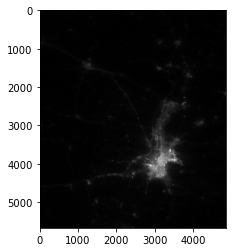

In [5]:
import rasterio
import matplotlib.pyplot as plt

# Open the TIF file using rasterio
with rasterio.open('VIIRS2022.tif') as src:
    # Read the image data as a numpy array
    img2 = src.read()

# Get the image dimensions
height, width = img2.shape[1:]

# Plot the image using matplotlib
fig, ax = plt.subplots()
ax.imshow(img2[0], cmap='gray') 
plt.show()


In [14]:
img2

array([[[1.2 , 1.2 , 1.2 , ..., 1.59, 1.59, 1.59],
        [1.2 , 1.2 , 1.2 , ..., 1.59, 1.59, 1.59],
        [1.2 , 1.2 , 1.2 , ..., 1.59, 1.59, 1.59],
        ...,
        [0.8 , 0.8 , 0.8 , ..., 0.46, 0.46, 0.46],
        [0.75, 0.75, 0.75, ..., 0.48, 0.48, 0.48],
        [0.75, 0.75, 0.75, ..., 0.48, 0.48, 0.48]]], dtype=float32)

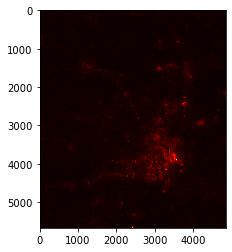

In [6]:
# Open the TIF file using rasterio
with rasterio.open('C.tif') as src:
    # Read the image data as a numpy array
    img3 = src.read()

# Get the image dimensions
height, width = img3.shape[1:]

# Plot the image using matplotlib
fig, ax = plt.subplots()
ax.imshow(img3[0], cmap='hot') 
plt.show()


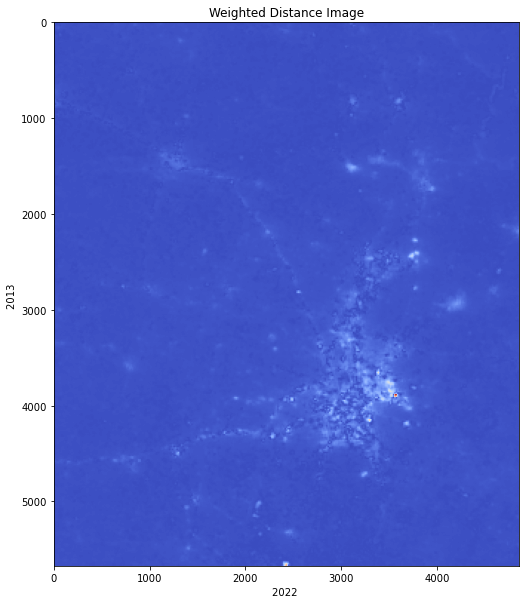

In [7]:
import rasterio
import numpy as np
from matplotlib import pyplot as plt
from rasterio.plot import show

# Open the output TIF file using rasterio
with rasterio.open('C.tif') as src:
    # Read the image data as a numpy array
    img = src.read(1)

# Get the image dimensions
height, width = img.shape

# Plot the image using matplotlib
fig, ax = plt.subplots(figsize=(10, 10))

# Set the axis labels and title
ax.set_xlabel('2022 ')
ax.set_ylabel('2013 ')
ax.set_title('Weighted Distance Image')

# Display the image using the 'coolwarm' color map
show(img, cmap='coolwarm', ax=ax)

# Show the plot
plt.show()


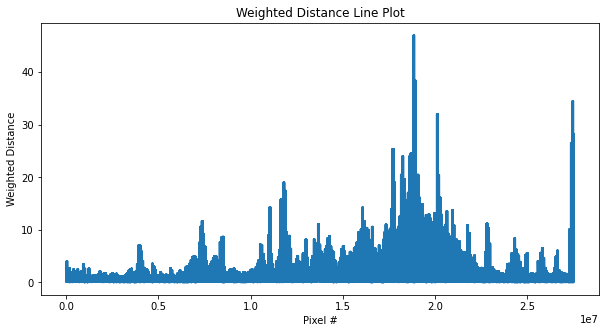

In [9]:
import rasterio
import numpy as np
from matplotlib import pyplot as plt

# Open the output TIF file using rasterio
with rasterio.open('c.tif') as src:
    # Read the image data as a numpy array
    img = src.read(1)

# Get the image dimensions
height, width = img.shape

# Plot the line plot
fig, ax = plt.subplots(figsize=(10, 5))

# Flatten the image array to a 1D array
flat_img = img.flatten()

# Plot the flattened image array as a line plot
ax.plot(flat_img)

# Set the x and y axis labels and the plot title
ax.set_xlabel('Pixel #')
ax.set_ylabel('Weighted Distance')
ax.set_title('Weighted Distance Line Plot')

# Show the plot
plt.show()


In [3]:
import rasterio
import numpy as np
from rasterio.windows import Window
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [10]:
import rasterio
from rasterio.windows import Window
import numpy as np
import pandas as pd
from skimage import exposure

# Load the two DNB images
with rasterio.open('VIIRS2022.tif') as src:
    img1 = src.read(1)
with rasterio.open('VIIRS2013.tif') as src:
    img2 = src.read(1)

# Define the block size
block_size = 512

# Calculate the number of rows and columns in each block
rows_per_block = img1.shape[0] // block_size
cols_per_block = img1.shape[1] // block_size

# Initialize the output array
output = np.zeros_like(img1)

# Loop through each block
for row in range(rows_per_block):
    for col in range(cols_per_block):
        # Define the block window
        window = Window(col*block_size, row*block_size, block_size, block_size)
        
        # Read the block data for each image
        block1 = img1[window.row_off:window.row_off+window.height, window.col_off:window.col_off+window.width]
        block2 = img2[window.row_off:window.row_off+window.height, window.col_off:window.col_off+window.width]
        
        # Calculate the histogram for each block
        hist1, _ = exposure.histogram(block1)
        hist2, _ = exposure.histogram(block2)
        
        # Calculate the weighted distance between the histograms
        distance = np.sqrt(np.sum(((hist1-hist2)**2) / (hist1+hist2+1)))
        
        # Write the distance to the output array for each pixel in the block
        output[window.row_off:window.row_off+window.height, window.col_off:window.col_off+window.width] = distance

# # Save the output array as a GeoTIFF file
# with rasterio.open('output.tif', 'w', driver='GTiff', width=img1.shape[1], height=img1.shape[0], count=1, dtype=output.dtype) as dst:
#     dst.write(output, 1)

# # Save the output array as a CSV file
# df = pd.DataFrame(output.flatten(), columns=['distance'])
# df.to_csv('output.csv', index=False)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio

# Open the input images
with rasterio.open('VIIRS2022.tif') as src1:
    dnb_image1 = src1.read(1)
    transform1 = src1.transform

with rasterio.open('VIIRS2013.tif') as src2:
    dnb_image2 = src2.read(1)
    transform2 = src2.transform

In [12]:
# Define the block size
block_size = 512

# Calculate the number of rows and columns in the image
rows, cols = dnb_image1.shape

# Create an empty array to store the block-based weighted distances
block_distances = np.zeros((rows, cols))


In [13]:
# Calculate the weighted distance between each pair of blocks
for r in range(0, rows, block_size):
    for c in range(0, cols, block_size):
        # Get the block from the first image
        block1 = dnb_image1[r:r+block_size, c:c+block_size]

        # Get the block from the second image
        block2 = dnb_image2[r:r+block_size, c:c+block_size]

        # Calculate the weighted distance between the blocks
        hist1, _ = np.histogram(block1, bins=256, range=(0, 255))
        hist2, _ = np.histogram(block2, bins=256, range=(0, 255))

        wdist = np.sum(np.sqrt(hist1*hist2))

        # Store the distance in the block_distances array
        block_distances[r:r+block_size, c:c+block_size] = wdist


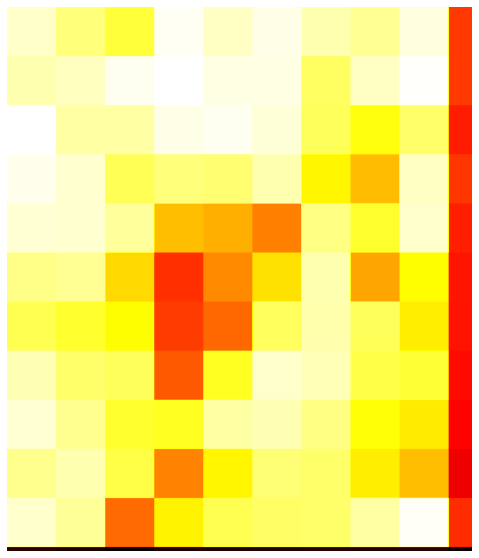

In [14]:
# Normalize the block_distances array to the range [0, 1]
block_distances = block_distances / np.max(block_distances)

# Display the difference between the two images
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(block_distances, cmap='hot')
ax.set_axis_off()
plt.show()

<AxesSubplot:>

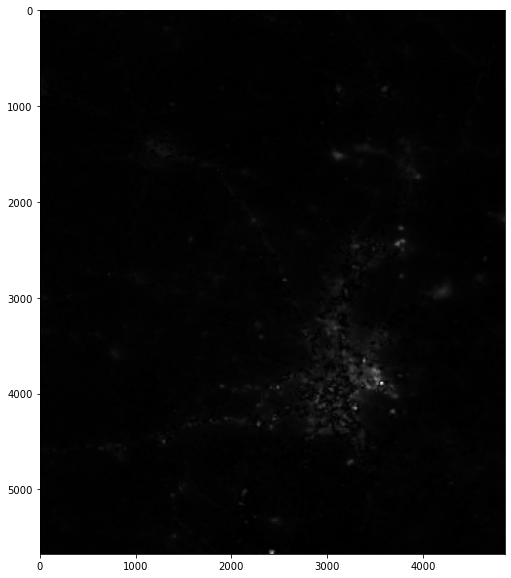

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
from scipy.ndimage.filters import gaussian_filter

# open the two images
with rio.open('VIIRS2022.tif') as src1:
    dnb1 = src1.read(1)

with rio.open('VIIRS2013.tif') as src2:
    dnb2 = src2.read(1)

# calculate the histogram for each image
hist1, _ = np.histogram(dnb1, bins=range(0, 10))
hist2, _ = np.histogram(dnb2, bins=range(0, 10))

# normalize the histograms
hist1 = hist1 / np.sum(hist1)
hist2 = hist2 / np.sum(hist2)

# calculate the weighted distance
wd = np.sqrt(np.sum((np.sqrt(hist1) - np.sqrt(hist2)) ** 2))

# calculate the gaussian filtered difference image
diff = np.abs(dnb2 - dnb1)
diff = gaussian_filter(diff, sigma=3)

# plot the difference image
fig, ax = plt.subplots(figsize=(10,10))
show(diff, ax=ax, cmap='gray')


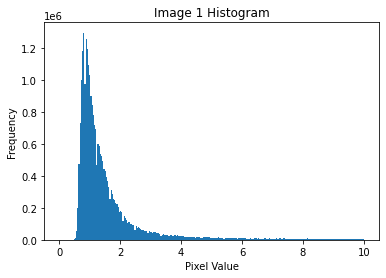

In [28]:
import matplotlib.pyplot as plt

# Plot histogram for image1
plt.hist(dnb1.ravel(), bins=256, range=(0, 10))
plt.title('Image 1 Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()



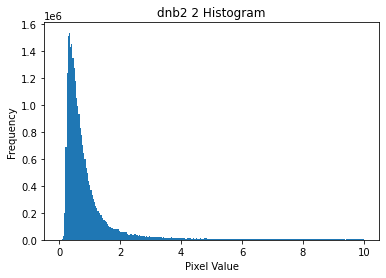

In [25]:
# Plot histogram for image2
plt.hist(dnb2.ravel(), bins=256, range=(0, 10))
plt.title('dnb2 2 Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


In [45]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the two DNB images
with rasterio.open('VIIRS2022.tif') as src1:
    dnb1 = src1.read(1)

with rasterio.open('VIIRS2013.tif') as src2:
    dnb2 = src2.read(1)



In [46]:
# Normalize input images
dnb1 = (dnb1-np.amin(dnb1)) / (np.amax(dnb1)-np.amin(dnb1))
dnb2 = (dnb2-np.amin(dnb2)) / (np.amax(dnb2)-np.amin(dnb2))


# Calculate the block-based weighted distance difference
window_size = 1024
histogram_bins = 32
block_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        block1 = dnb1[i:i+window_size, j:j+window_size]
        block2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(block1, bins=histogram_bins)
        hist2, _ = np.histogram(block2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        block_diff[i:i+window_size, j:j+window_size] = wdd



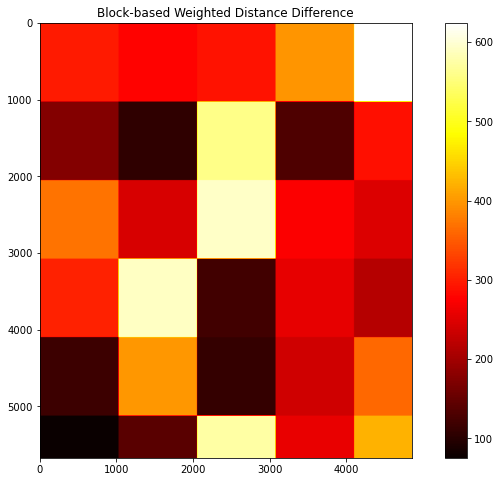

In [47]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(12, 8))
plt.imshow(block_diff, cmap='hot')
plt.title('Block-based Weighted Distance Difference')
plt.colorbar()
plt.show()


In [2]:
dnb1

array([[0.01015292, 0.01015292, 0.01015292, ..., 0.01504136, 0.01504136,
        0.01504136],
       [0.01015292, 0.01015292, 0.01015292, ..., 0.01504136, 0.01504136,
        0.01504136],
       [0.01015292, 0.01015292, 0.01015292, ..., 0.01504136, 0.01504136,
        0.01504136],
       ...,
       [0.00513913, 0.00513913, 0.00513913, ..., 0.00087741, 0.00087741,
        0.00087741],
       [0.00451241, 0.00451241, 0.00451241, ..., 0.0011281 , 0.0011281 ,
        0.0011281 ],
       [0.00451241, 0.00451241, 0.00451241, ..., 0.0011281 , 0.0011281 ,
        0.0011281 ]], dtype=float32)

In [3]:
dnb2

array([[0.0069716 , 0.0069716 , 0.0069716 , ..., 0.0130463 , 0.0130463 ,
        0.0130463 ],
       [0.0069716 , 0.0069716 , 0.0069716 , ..., 0.0130463 , 0.0130463 ,
        0.0130463 ],
       [0.0069716 , 0.0069716 , 0.0069716 , ..., 0.0130463 , 0.0130463 ,
        0.0130463 ],
       ...,
       [0.0013934 , 0.0013934 , 0.0013934 , ..., 0.00033086, 0.00033086,
        0.00033086],
       [0.00138523, 0.00138523, 0.00138523, ..., 0.00054839, 0.00054839,
        0.00054839],
       [0.00138523, 0.00138523, 0.00138523, ..., 0.00054839, 0.00054839,
        0.00054839]], dtype=float32)

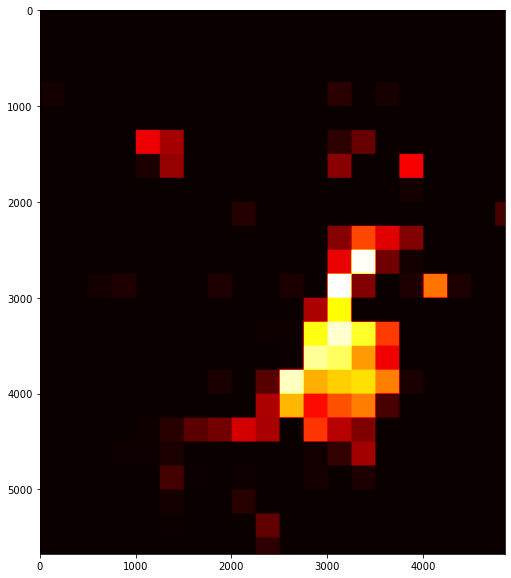

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

# Load input images
with rasterio.open('VIIRS2022.tif') as src:
    img1 = src.read(1)
with rasterio.open('VIIRS2013.tif') as src:
    img2 = src.read(1)

# Normalize input images
img1_norm = img1 / np.amax(img1)
img2_norm = img2 / np.amax(img2)

# Define block size
block_size = 250

# Calculate weighted distance between images using histogram
diff = np.zeros_like(img1_norm)
for r in range(0, img1_norm.shape[0], block_size):
    for c in range(0, img1_norm.shape[1], block_size):
        r_end = min(r+block_size, img1_norm.shape[0])
        c_end = min(c+block_size, img1_norm.shape[1])
        hist1, _ = np.histogram(img1_norm[r:r_end, c:c_end], bins=10, range=(0, 1))
        hist2, _ = np.histogram(img2_norm[r:r_end, c:c_end], bins=10, range=(0, 1))
        diff[r:r_end, c:c_end] = np.sqrt(np.sum((hist1-hist2)**2))

# Plot difference image
fig, ax = plt.subplots(figsize=(10, 10))
show(diff, ax=ax, cmap='hot')
plt.show()

# Save difference image to file
with rasterio.open('diff_block.tif', 'w', driver='GTiff', width=diff.shape[1], height=diff.shape[0], count=1, dtype=diff.dtype, crs=src.crs, transform=src.transform) as dst:
    dst.write(diff, 1)


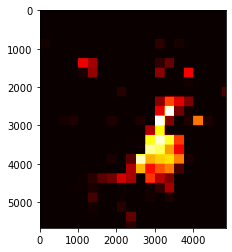

In [6]:
# Open the TIF file using rasterio
with rasterio.open('diff_block.tif') as src:
    # Read the image data as a numpy array
    img3 = src.read()

# Get the image dimensions
height, width = img3.shape[1:]

# Plot the image using matplotlib
fig, ax = plt.subplots()
ax.imshow(img3[0], cmap='hot') 
plt.show()

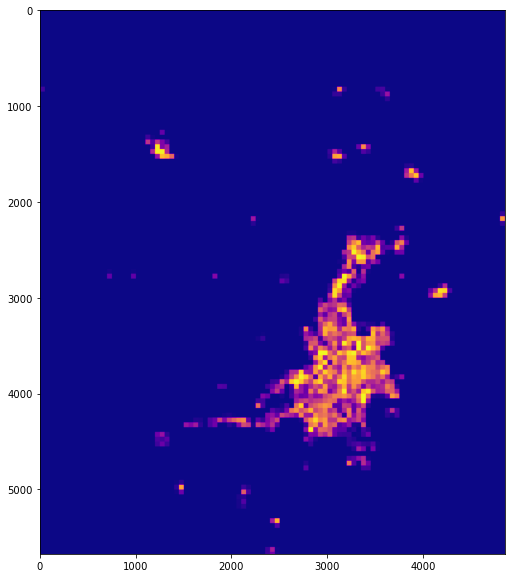

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

# Load input images
with rasterio.open('VIIRS2022.tif') as src:
    img1 = src.read(1)
with rasterio.open('VIIRS2013.tif') as src:
    img2 = src.read(1)

# # Normalize input images
# img1_norm = img1 / np.amax(img1)
# img2_norm = img2 / np.amax(img2)

img1_norm = (img1-np.amin(img1)) / (np.amax(img1)-np.amin(img1))
img2_norm = (img2-np.amin(img2)) / (np.amax(img2)-np.amin(img2))


# Define block size
block_size = 50

# Calculate weighted distance between images using histogram
diff = np.zeros_like(img1_norm)
for r in range(0, img1_norm.shape[0], block_size):
    for c in range(0, img1_norm.shape[1], block_size):
        r_end = min(r+block_size, img1_norm.shape[0])
        c_end = min(c+block_size, img1_norm.shape[1])
        hist1, _ = np.histogram(img1_norm[r:r_end, c:c_end], bins=10, range=(0, 1))
        hist2, _ = np.histogram(img2_norm[r:r_end, c:c_end], bins=10, range=(0, 1))
        diff[r:r_end, c:c_end] = np.sqrt(np.sum((hist1-hist2)**2))

# Plot difference image
fig, ax = plt.subplots(figsize=(10, 10))
show(diff, ax=ax, cmap='plasma')

plt.show()

# Save difference image to file
with rasterio.open('diff.tif', 'w', driver='GTiff', width=diff.shape[1], height=diff.shape[0], count=1, dtype=diff.dtype, crs=src.crs, transform=src.transform) as dst:
    dst.write(diff, 1)


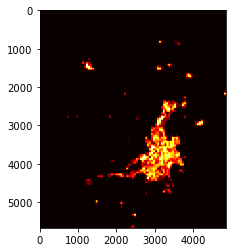

In [2]:
# Open the TIF file using rasterio
with rasterio.open('diff.tif') as src:
    # Read the image data as a numpy array
    img3 = src.read()

# Get the image dimensions
height, width = img3.shape[1:]

# Plot the image using matplotlib
fig, ax = plt.subplots()
ax.imshow(img3[0], cmap='hot') 
plt.show()

In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the two DNB images
with rasterio.open('VIIRS2022.tif') as src1:
    dnb1 = src1.read(1)

with rasterio.open('VIIRS2013.tif') as src2:
    dnb2 = src2.read(1)



In [4]:
# Normalize input images
dnb1 = (dnb1-np.amin(dnb1)) / (np.amax(dnb1)-np.amin(dnb1))
dnb2 = (dnb2-np.amin(dnb2)) / (np.amax(dnb2)-np.amin(dnb2))


# Calculate the block-based weighted distance difference
window_size = 50
histogram_bins = 8
block_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        block1 = dnb1[i:i+window_size, j:j+window_size]
        block2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(block1, bins=histogram_bins)
        hist2, _ = np.histogram(block2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        block_diff[i:i+window_size, j:j+window_size] = wdd



In [5]:
# Calculate the threshold based on the block-based weighted distance difference
threshold = np.mean(block_diff) + 2 * np.std(block_diff)


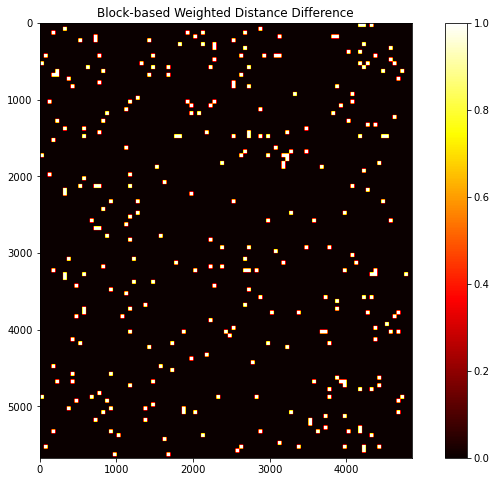

In [6]:
#threshold = 10
# Plot the block-based weighted distance difference
plt.figure(figsize=(12, 8))
plt.imshow(block_diff>threshold, cmap='hot')
plt.title('Block-based Weighted Distance Difference')
plt.colorbar()
plt.show()


In [7]:

from skimage.filters import threshold_triangle

threshold = threshold_triangle(block_diff)


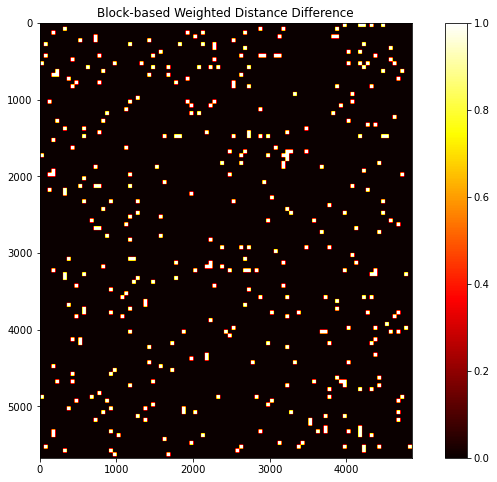

In [8]:
#threshold = 10
# Plot the block-based weighted distance difference
plt.figure(figsize=(12, 8))
plt.imshow(block_diff>threshold, cmap='hot')
plt.title('Block-based Weighted Distance Difference')
plt.colorbar()
plt.show()


In [39]:
from skimage.filters import threshold_local

# Ensure block_size is odd
if window_size % 2 == 0:
    window_size += 1

# Calculate the threshold using Adaptive Thresholding
block_diff_threshold = threshold_local(block_diff, window_size, method='gaussian', mode='reflect')


In [41]:
block_diff_threshold

array([[34.578667 , 34.578667 , 34.578667 , ..., 23.89423  , 23.791441 ,
        23.738945 ],
       [34.578667 , 34.578667 , 34.578667 , ..., 23.89423  , 23.791441 ,
        23.738945 ],
       [34.578667 , 34.578667 , 34.578667 , ..., 23.89423  , 23.791441 ,
        23.738945 ],
       ...,
       [15.9595585, 15.9595585, 15.9595585, ..., 28.28782  , 28.126019 ,
        28.043386 ],
       [15.939333 , 15.939333 , 15.939333 , ..., 28.29013  , 28.128267 ,
        28.045603 ],
       [15.929542 , 15.929542 , 15.929542 , ..., 28.291248 , 28.129354 ,
        28.046675 ]], dtype=float32)

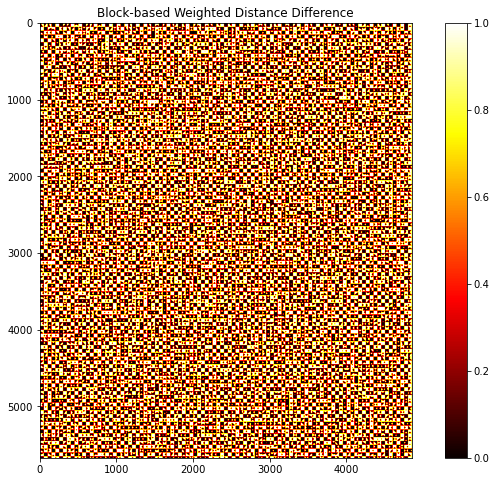

In [40]:
#threshold = 10
# Plot the block-based weighted distance difference
plt.figure(figsize=(12, 8))
plt.imshow(block_diff>block_diff_threshold, cmap='hot')
plt.title('Block-based Weighted Distance Difference')
plt.colorbar()
plt.show()


In [42]:
from skimage.filters import threshold_otsu

block_diff_threshold = threshold_otsu(block_diff)


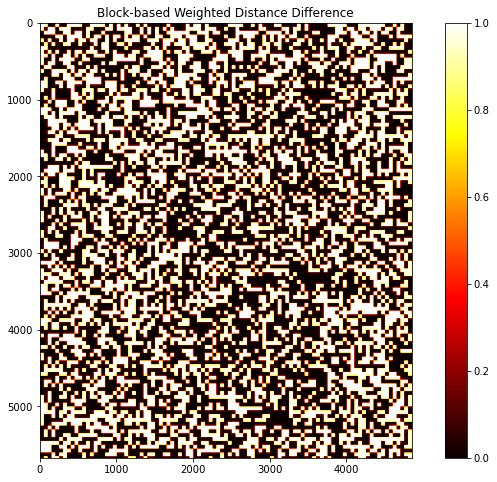

In [43]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(12, 8))
plt.imshow(block_diff > block_diff_threshold, cmap='hot')
plt.title('Block-based Weighted Distance Difference')
plt.colorbar()
plt.show()

In [9]:
img1

array([[[1.0139039 , 1.0139039 , 1.0139039 , ..., 0.7544961 ,
         0.7544961 , 0.7544961 ],
        [1.0139039 , 1.0139039 , 1.0139039 , ..., 0.7544961 ,
         0.7544961 , 0.7544961 ],
        [1.0139039 , 1.0139039 , 1.0139039 , ..., 0.7544961 ,
         0.7544961 , 0.7544961 ],
        ...,
        [0.8318498 , 0.8318498 , 0.8318498 , ..., 0.41891903,
         0.41891903, 0.41891903],
        [0.8318498 , 0.8318498 , 0.8318498 , ..., 0.41891903,
         0.41891903, 0.41891903],
        [0.8318498 , 0.8318498 , 0.8318498 , ..., 0.41891903,
         0.41891903, 0.41891903]]], dtype=float32)

In [27]:
width0

6304

In [28]:
height0

4370

In [20]:
height


4370

In [21]:
width

6304

In [36]:
# Calculate the block-based weighted distance difference
window_size = 850
histogram_bins = 8
block_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        block1 = dnb1[i:i+window_size, j:j+window_size]
        block2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(block1, bins=histogram_bins)
        hist2, _ = np.histogram(block2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        block_diff[i:i+window_size, j:j+window_size] = wdd



In [37]:
from skimage.filters import threshold_otsu

block_diff_threshold = threshold_otsu(block_diff)


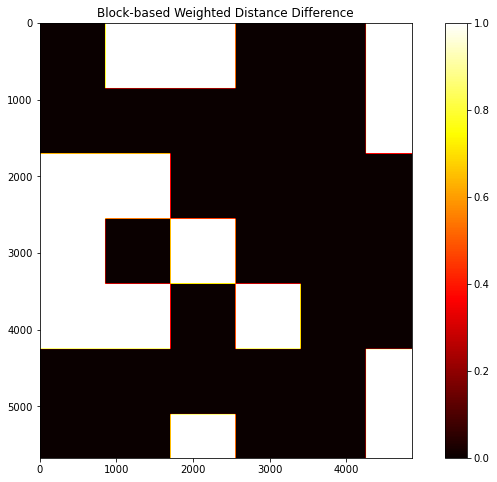

In [38]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(12, 8))
plt.imshow(block_diff>block_diff_threshold, cmap='hot')
plt.title('Block-based Weighted Distance Difference')
plt.colorbar()
plt.show()


In [39]:

from skimage.filters import threshold_triangle

threshold = threshold_triangle(block_diff)


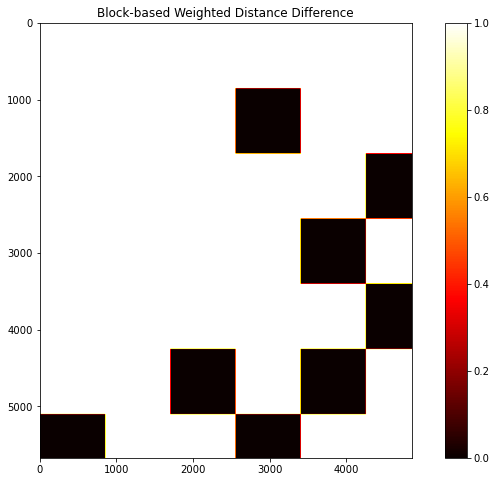

In [40]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(12, 8))
plt.imshow(block_diff>threshold, cmap='hot')
plt.title('Block-based Weighted Distance Difference')
plt.colorbar()
plt.show()


In [41]:
from skimage.filters import threshold_local

# Ensure block_size is odd
if window_size % 2 == 0:
    window_size += 1

# Calculate the threshold using Adaptive Thresholding
block_diff_threshold = threshold_local(block_diff, window_size, method='gaussian', mode='reflect')


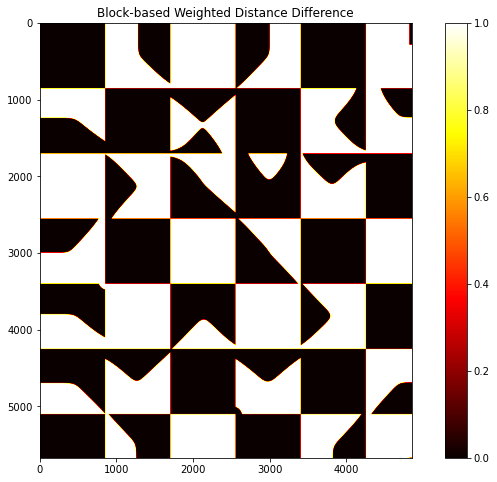

In [44]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(12, 8))
plt.imshow(block_diff>block_diff_threshold, cmap='hot')
plt.title('Block-based Weighted Distance Difference')
plt.colorbar()
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


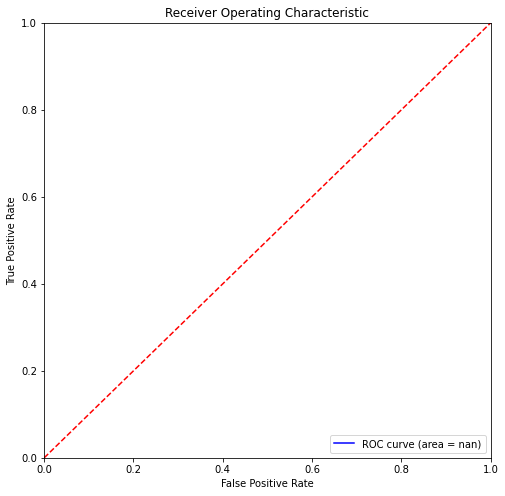

Optimal Threshold: 15.142136


In [12]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Calculate the block-based weighted distance difference
window_size = 10
histogram_bins = 8
block_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        block1 = dnb1[i:i+window_size, j:j+window_size]
        block2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(block1, bins=histogram_bins)
        hist2, _ = np.histogram(block2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        block_diff[i:i+window_size, j:j+window_size] = wdd

# Create ground truth labels indicating change (1) or no change (0)
ground_truth = np.zeros_like(block_diff)
# Populate ground truth labels based on your dataset

# Flatten the block_diff and ground_truth arrays
block_diff_flat = block_diff.flatten()
ground_truth_flat = ground_truth.flatten()

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(ground_truth_flat, block_diff_flat)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Find the optimal threshold based on the ROC curve
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]

print('Optimal Threshold:', optimal_threshold)


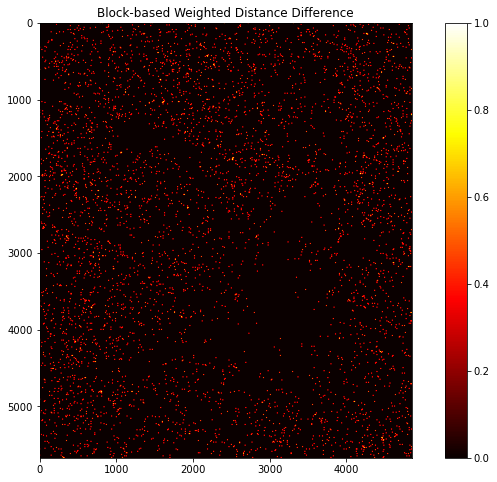

In [24]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(12, 8))
plt.imshow(block_diff>14.142135, cmap='hot')
plt.title('Block-based Weighted Distance Difference')
plt.colorbar()
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


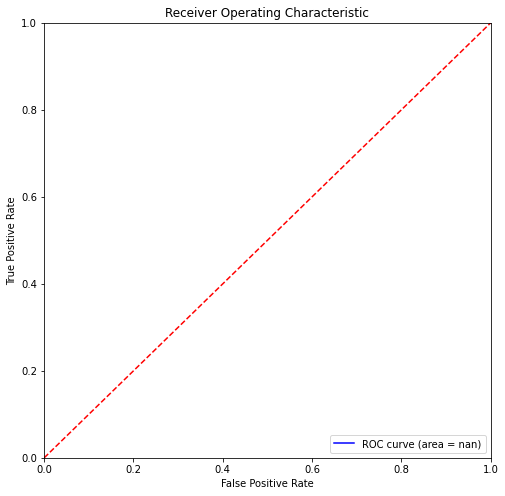

Optimal Threshold: 306.23727


In [42]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Calculate the block-based weighted distance difference
window_size = 850
histogram_bins = 8
block_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        block1 = dnb1[i:i+window_size, j:j+window_size]
        block2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(block1, bins=histogram_bins)
        hist2, _ = np.histogram(block2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        block_diff[i:i+window_size, j:j+window_size] = wdd

# Create ground truth labels indicating change (1) or no change (0)
ground_truth = np.zeros_like(block_diff)
# Populate ground truth labels based on your dataset

# Flatten the block_diff and ground_truth arrays
block_diff_flat = block_diff.flatten()
ground_truth_flat = ground_truth.flatten()

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(ground_truth_flat, block_diff_flat)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Find the optimal threshold based on the ROC curve
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]

print('Optimal Threshold:', optimal_threshold)


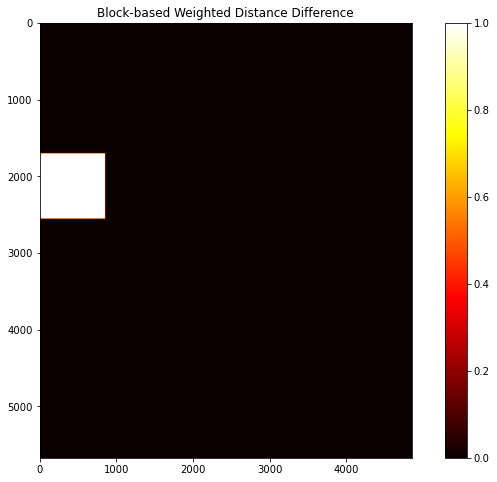

In [43]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(12, 8))
plt.imshow(block_diff>305.0661, cmap='hot')
plt.title('Block-based Weighted Distance Difference')
plt.colorbar()
plt.show()
